In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Euclidean Distance Function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [3]:
# Initialize Centroids
def initialize_centroids(X, k):
    np.random.seed(42)
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:k]]
    return centroids

In [4]:
# Assign Clusters
def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)


In [5]:
# Update Centroids
def update_centroids(X, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[clusters == i]
        if len(cluster_points) > 0:
            new_centroid = np.mean(cluster_points, axis=0)
        else:
            new_centroid = np.zeros(X.shape[1])
        new_centroids.append(new_centroid)
    return np.array(new_centroids)

In [6]:
# K-Means Clustering Algorithm
def kmeans_clustering(X, k, max_iterations=100, tolerance=1e-4):
    centroids = initialize_centroids(X, k)
    for iteration in range(max_iterations):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            break
        centroids = new_centroids
    return clusters, centroids

In [7]:
# Evaluate Clustering (Within-Cluster Sum of Squares)
def compute_wcss(X, clusters, centroids):
    wcss = 0
    for i, centroid in enumerate(centroids):
        cluster_points = X[clusters == i]
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

In [8]:
# Generate Synthetic Dataset (Optional)
from sklearn.datasets import make_blobs

In [9]:
# Create a dataset with 3 clusters
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)


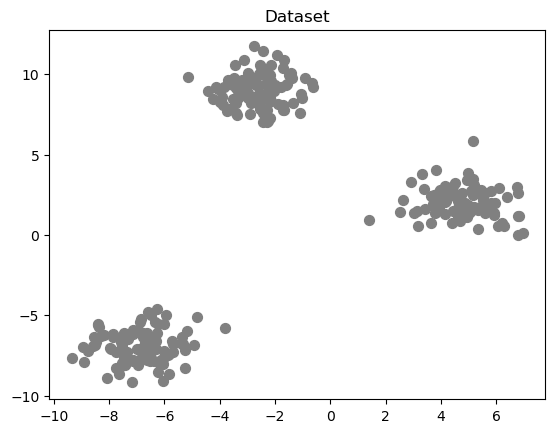

In [10]:
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=50, c='gray')
plt.title("Dataset")
plt.show()

In [11]:
# Apply K-Means Clustering
k = 3
clusters, centroids = kmeans_clustering(X, k)

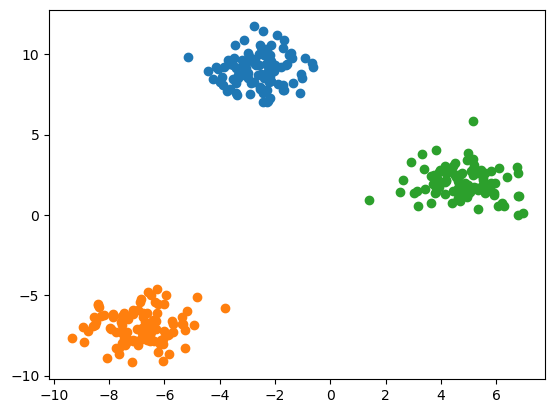

In [12]:
# Visualize Clusters
for i in range(k):
    cluster_points = X[clusters == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i+1}")


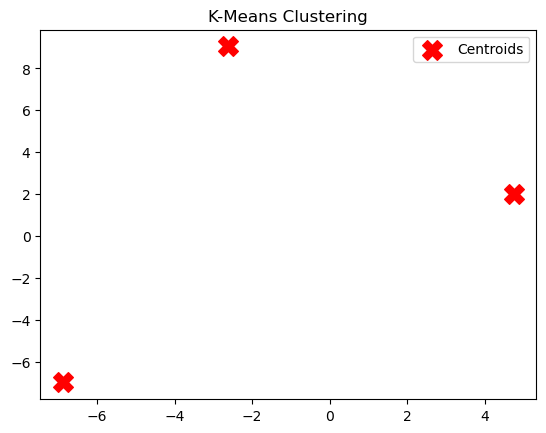

In [13]:
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()

In [14]:
# Evaluate Clustering
wcss = compute_wcss(X, clusters, centroids)
print(f"Within-Cluster Sum of Squares (WCSS): {wcss:.2f}")

Within-Cluster Sum of Squares (WCSS): 566.86
